In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

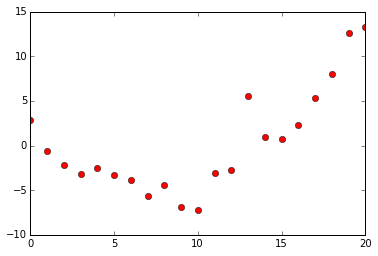

In [13]:
n = 21
x = np.linspace(0, 20, n)
w = np.array([-1.5, 1.0 / 9])
y = w[0] * x + w[1] * x ** 2 + stats.norm.rvs(size = n) * 2

plt.plot(x, y, 'ro')
plt.show()

In [51]:
def recursive_mean(x, n, xbar):
    return x if xbar == None else (xbar + (x - xbar) / (n + 1.0))

def recursive_var(n, x, xbar, xbar_next, cxx):
    if cxx == None:
        return 0
    else:
        return ((x ** 2 + n * cxx + n * xbar ** 2 - (n + 1) * xbar_next ** 2) / (n + 1.0))

xbar = None
cxx = None
x = [3, 4, 5, 6, 7, 8]
y = [4, 5, 6, 7, 8, 1]

for i in range(len(x)):
    xbar_next = recursive_mean(x[i], i, xbar)
    cxx = recursive_var(i, x[i], xbar, xbar_next, cxx)
    xbar = xbar_next
    
np.var(xs), cxx

(2.9166666666666665, 2.9166666666666665)